# Bootstrapping Demo
By Connor MacMillan, Joren Libunao, and Zemin Cai

## Original sample data

In [11]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


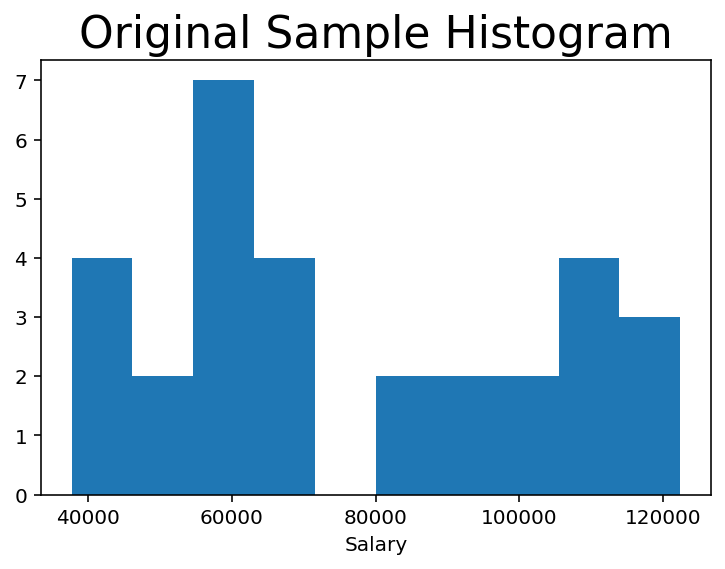

In [2]:
original_sample = df["Salary"]
plt.hist(original_sample)
plt.title("Original Sample Histogram", fontsize=22)
plt.xlabel("Salary")
plt.show()

## Resample from the original

In [3]:
def get_a_resample(sample):
    new_sample = []
    for i in range(len(sample)):
        index = random.randint(0, len(sample)-1)
        new_sample.append(sample[index])
    return new_sample

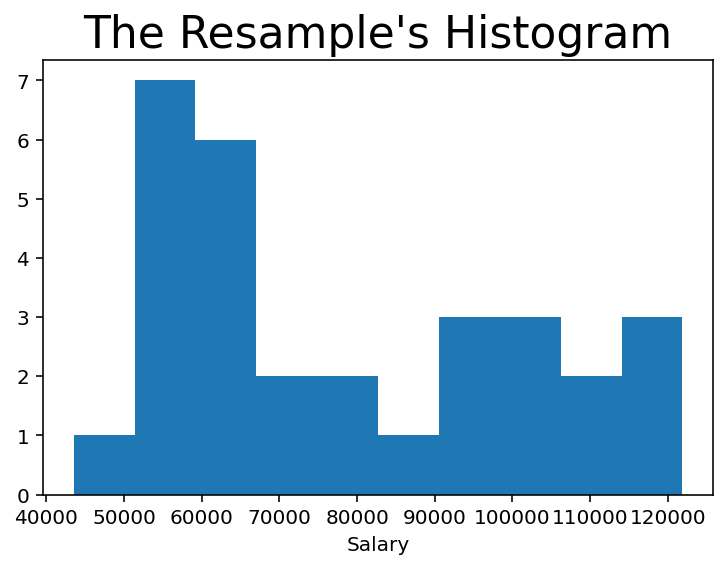

In [4]:
resample = get_a_resample(original_sample)
plt.hist(resample)
plt.title("The Resample's Histogram", fontsize=22)
plt.xlabel("Salary")
plt.show()

## Calculate 95% Confidence Interval of the Mean Salary


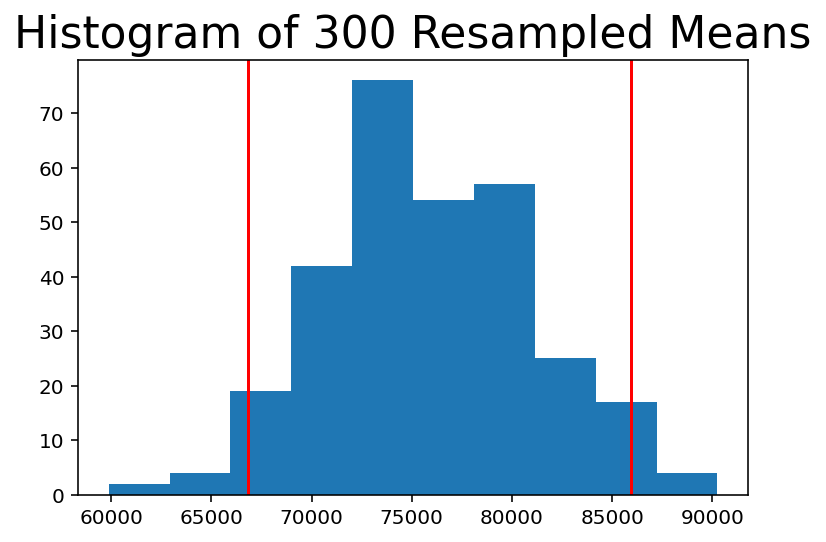

95% Confidence Interval
[66835.35916667 85938.30916667]


In [5]:
sample = df["Salary"]
num_of_samples = 300
means = []
for i in range(num_of_samples):
    resample = get_a_resample(sample)
    means.append(np.mean(resample))

plt.hist(means)
plt.title("Histogram of 300 Resampled Means", fontsize=22)
CI = np.quantile(means, [0.025, .975])
plt.axvline(CI[0], color="red")
plt.axvline(CI[1], color='red')
plt.show()

print("95% Confidence Interval")
print(CI)

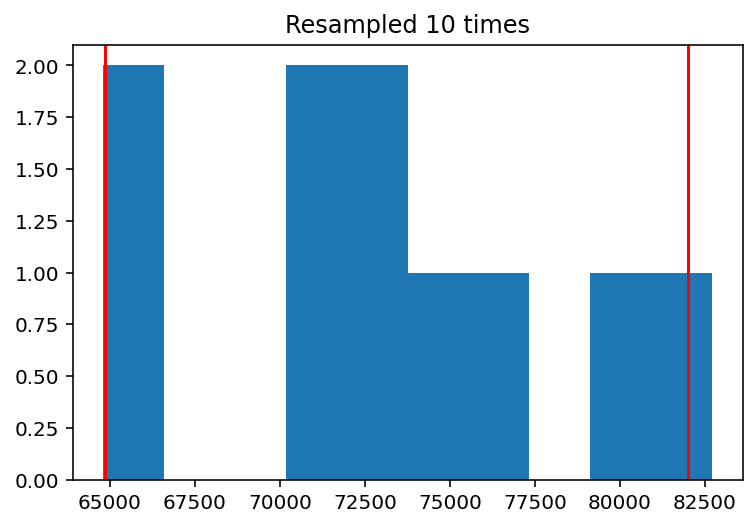

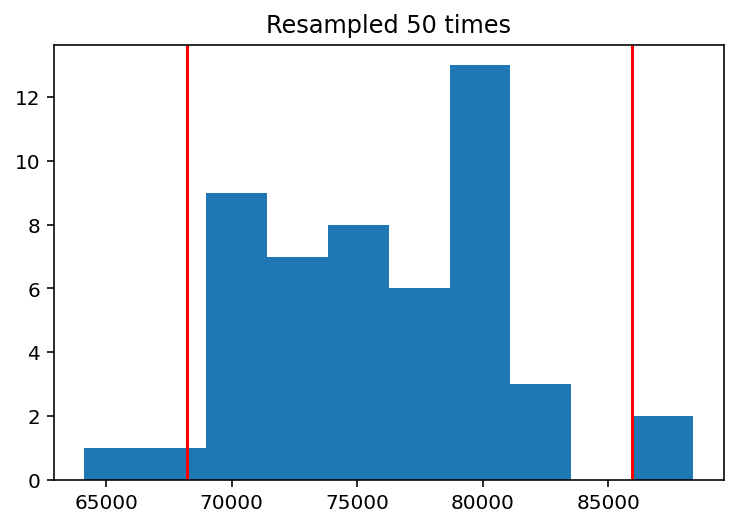

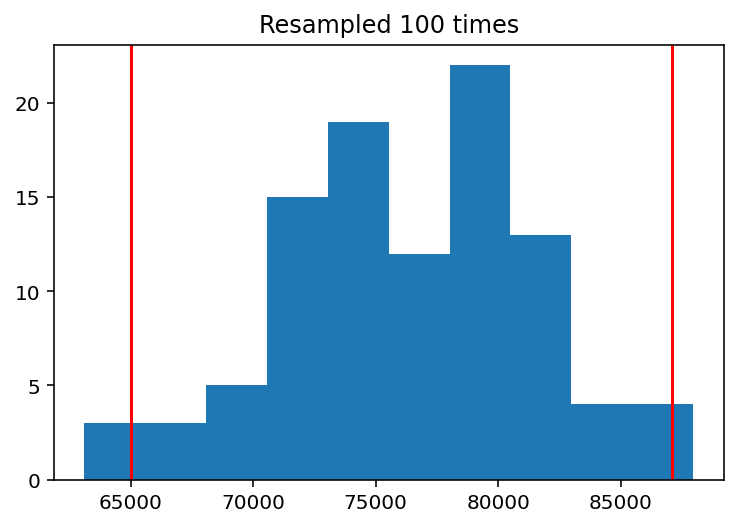

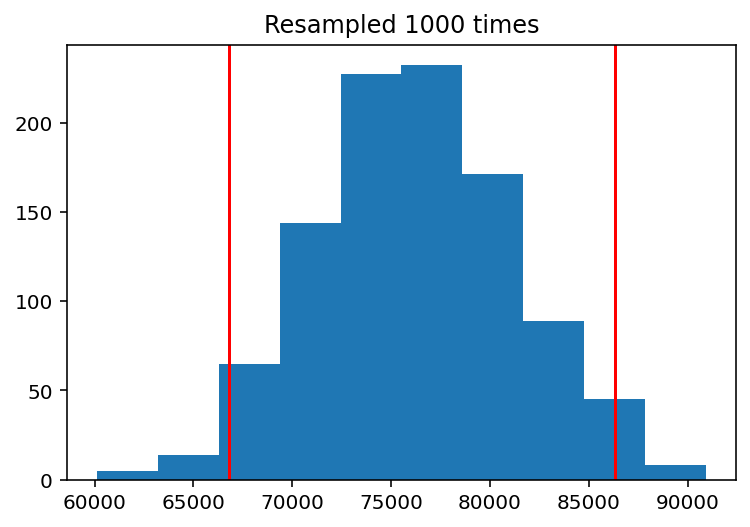

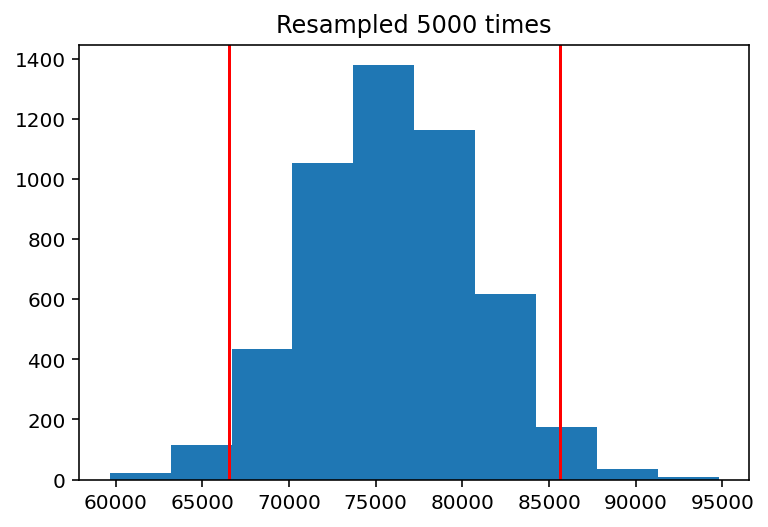

In [6]:
from scipy import stats
num_of_samples = [10, 50, 100, 1000, 5000]
CIs = {}
for num_samples in num_of_samples:
    means = []
    for i in range(num_samples):
        resample = get_a_resample(sample)
        means.append(np.mean(resample))

    plt.hist(means)
    CI = np.quantile(means, [0.025, .975])
    plt.axvline(CI[0], color="red")
    plt.axvline(CI[1], color='red')
    plt.xlim()
    plt.title("Resampled " + str(num_samples) + " times")
    plt.show(np.min(sample), np.max(sample))
    CIs[num_samples] = CI

In [7]:
CIs = pd.DataFrame(CIs).T
CIs.columns = ["Lowerbound", "Upperbound"]
CIs

,Lowerbound,Upperbound
10,64871.103333,81990.183333
50,68218.375833,85954.010833
100,65029.469167,87103.363333
1000,66798.385833,86306.221667
5000,66530.799167,85607.544167


## Calculate 95% Confidence Interval of the Median Salary


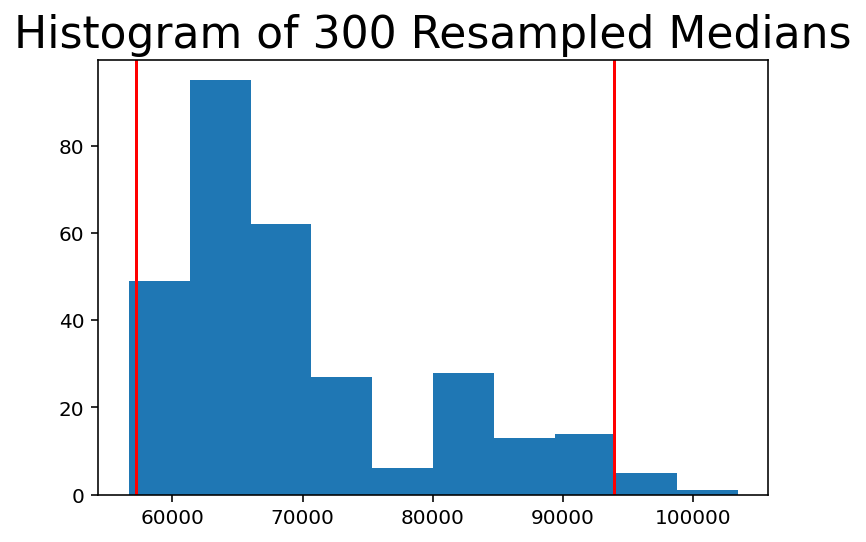

95% Confidence Interval
[57189. 93940.]


In [8]:
sample = df["Salary"]
num_of_samples = 300
medians = []
for i in range(num_of_samples):
    resample = get_a_resample(sample)
    medians.append(np.median(resample))

plt.hist(medians)
plt.title("Histogram of 300 Resampled Medians", fontsize=22)
CI = np.quantile(medians, [0.025, .975])
plt.axvline(CI[0], color="red")
plt.axvline(CI[1], color='red')
plt.show()

print("95% Confidence Interval")
print(CI)

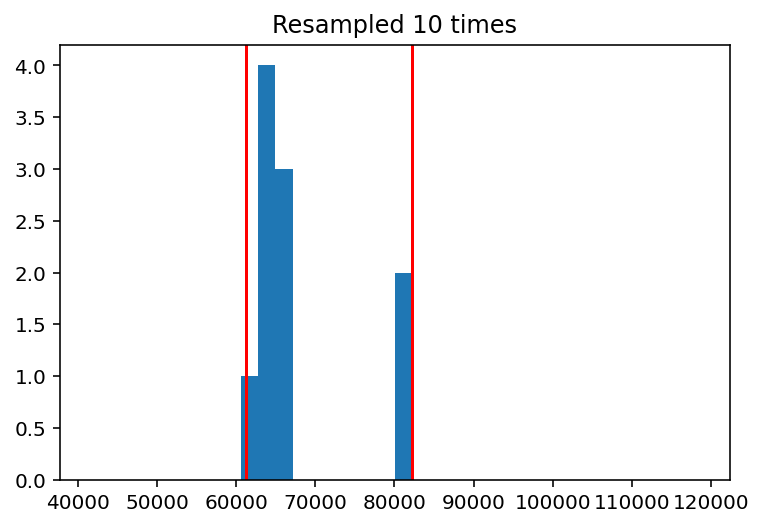

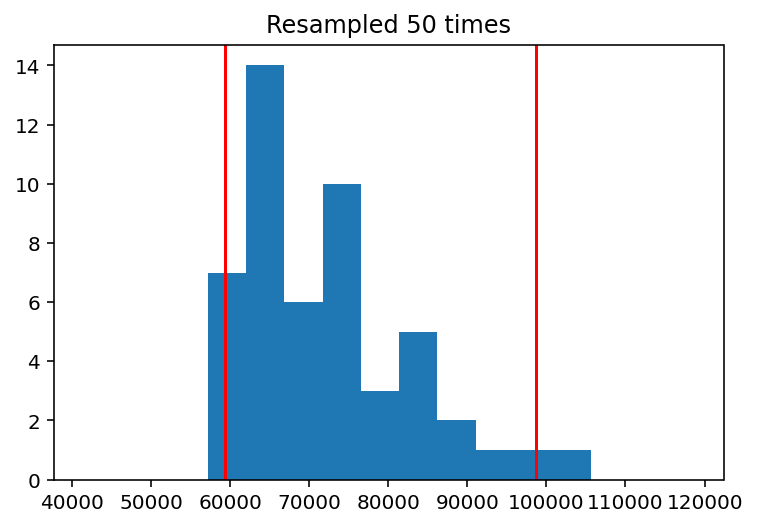

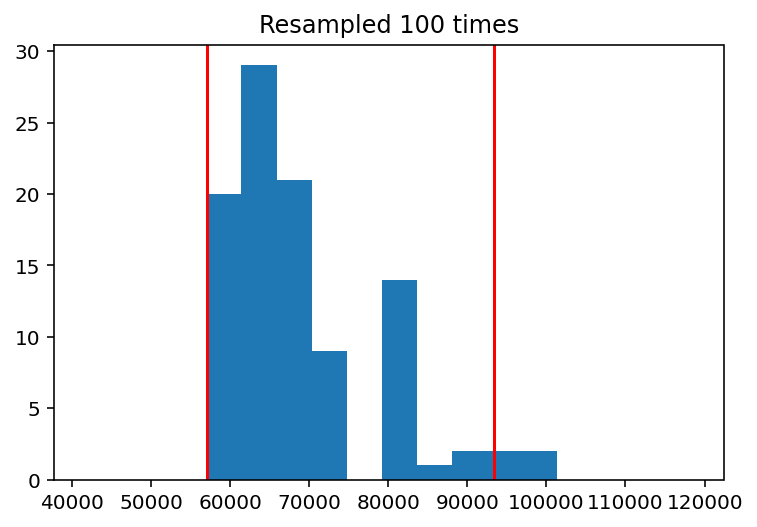

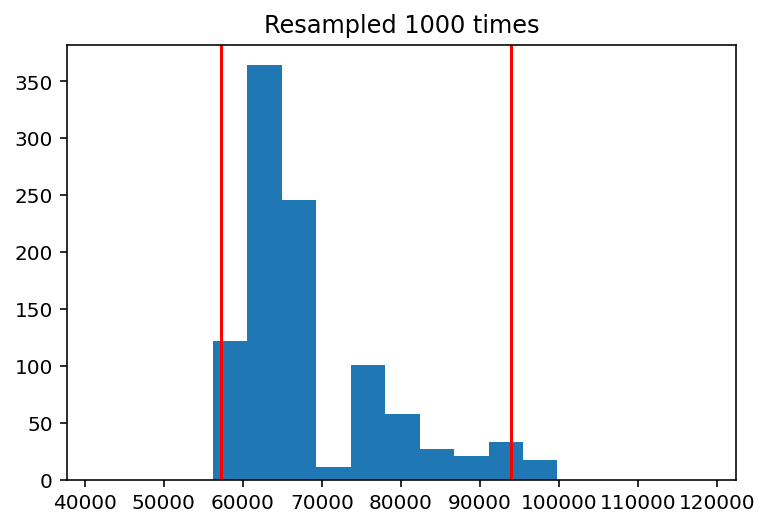

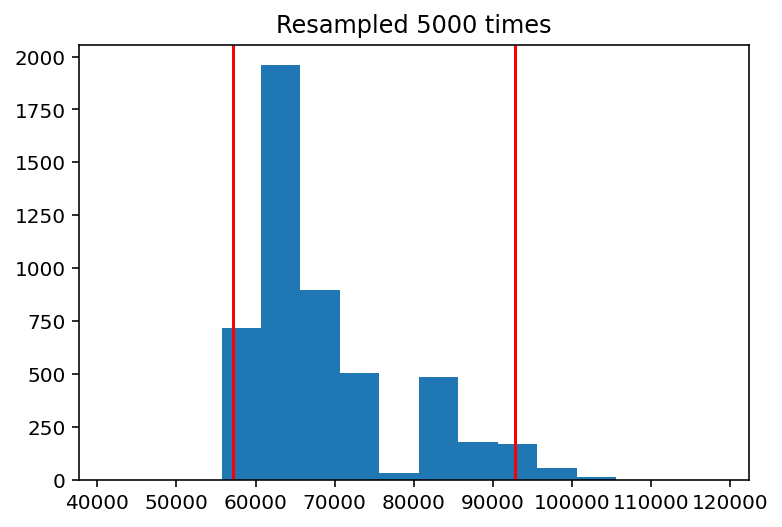

In [9]:
num_of_samples = [10, 50, 100, 1000, 5000]
CIs = {}
for num_samples in num_of_samples:
    medians = []
    for i in range(num_samples):
        resample = get_a_resample(sample)
        medians.append(np.median(resample))

    plt.hist(medians)
    CI = np.quantile(medians, [0.025, .975])
    plt.axvline(CI[0], color="red")
    plt.axvline(CI[1], color='red')
    plt.xlim(np.min(sample), np.max(sample))
    plt.title("Resampled " + str(num_samples) + " times")
    plt.show(np.min(sample), np.max(sample))
    CIs[num_samples] = CI

In [10]:
CIs = pd.DataFrame(CIs).T
CIs.columns = ["Lowerbound", "Upperbound"]
CIs

,Lowerbound,Upperbound
10,61183.775,82225.500
50,59375.000,98711.550
100,57132.300,93417.025
1000,57189.000,93940.000
5000,57135.000,92839.000


## Next Concepts
We can use bootstrapping for more than just the mean or median. We can use it to find performance statistics for Machine Learning models by training on the observations selected in the resample and then testing on the observations that were not used. We can then get a better idea of how much a model varies with changes in our input data.